In [1]:
import sys
sys.path.append('../')
from functions import *
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### データ読込

In [2]:
task, target = 'consistent', 'CostSum'
in_dir = f'../data/two_years_each/val/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

../functions.py:28: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  return m[x.name.weekday_name]
../functions.py:24: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  return 1 if x.name.weekday_name in ['Saturday', 'Sunday'] else 0


### 目的変数の分布

[]

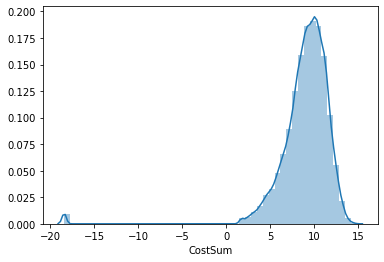

In [3]:
sns.distplot(np.log(df_train_Y[target] + 0.00000001))
plt.plot()

### データ構造転換

In [4]:
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

/Users/dushu/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dushu/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


### パラメータのベイズ最適化

In [5]:
#params = optimize()
#params

### xgboost のバリデーションモデルを作成
- 最適化されたパラメータでモデルを作成

In [6]:
params = {
     'alpha': 2.8578608885510106e-05,
     'colsample_bytree': 0.9,
     'eta': 0.375,
     'gamma': 1.626902660420816e-05,
     'lambda': 0.9604127545221981,
     'max_depth': 5,
     'min_child_weight': 2.029792498237964,
     'n_estimators': 374.0,
     'subsample': 0.9500000000000001
}

model, evals_result = train2(d_train_sales, d_val_sales, params)
best_iter = model.best_iteration

[0]	train-rmse:5.74062	eval-rmse:5.88756
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[1]	train-rmse:3.74609	eval-rmse:3.72274
[2]	train-rmse:2.56539	eval-rmse:2.3769
[3]	train-rmse:1.90741	eval-rmse:1.54488
[4]	train-rmse:1.56256	eval-rmse:1.05411
[5]	train-rmse:1.39501	eval-rmse:0.772856
[6]	train-rmse:1.31057	eval-rmse:0.628009
[7]	train-rmse:1.26817	eval-rmse:0.556454
[8]	train-rmse:1.2381	eval-rmse:0.525082
[9]	train-rmse:1.21736	eval-rmse:0.511633
[10]	train-rmse:1.19107	eval-rmse:0.506953
[11]	train-rmse:1.16951	eval-rmse:0.504903
[12]	train-rmse:1.14321	eval-rmse:0.504416
[13]	train-rmse:1.13301	eval-rmse:0.504958
[14]	train-rmse:1.1266	eval-rmse:0.50144
[15]	train-rmse:1.11525	eval-rmse:0.50133
[16]	train-rmse:1.10117	eval-rmse:0.500379
[17]	train-rmse:1.08858	eval-rmse:0.49865
[18]	train-rmse:1.07248	eval-rmse:0.499929
[19]	train-rmse:1.06691	eval-rmse:0.499914
[20]	train-rmse:1.

### 損失関数の曲線

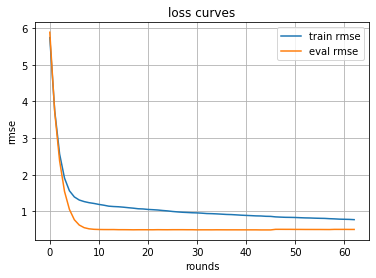

In [7]:
def draw_loss(evals_result):
    train_metric = evals_result['train']['rmse']
    plt.plot(train_metric, label='train rmse')
    eval_metric = evals_result['eval']['rmse']
    plt.plot(eval_metric, label='eval rmse')
    plt.grid()
    plt.legend()
    plt.title('loss curves')
    plt.xlabel('rounds')
    plt.ylabel('rmse')
    plt.show()
draw_loss(evals_result)

### バリデーション結果と実測値

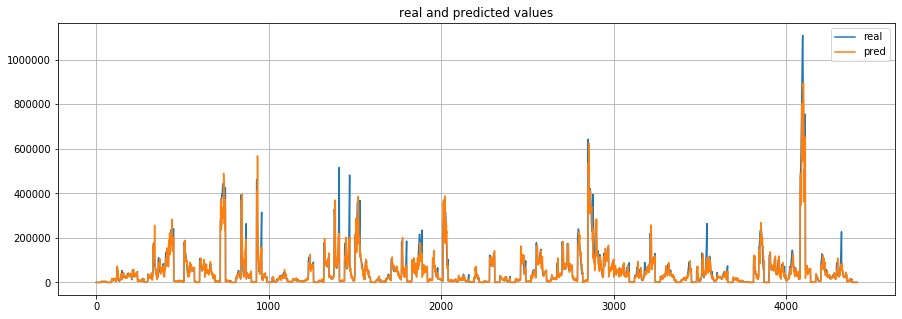

In [8]:
def draw_preds(model, d_val, df_val_Y, target, pred_type='validation'):
    d_pred_log = model.predict(d_val)
    d_pred = np.exp(d_pred_log)
    
    df_val_Y[f'{target}_pred'] = d_pred
    df_val_Y.to_excel(f'./output/{target}_{pred_type}.xlsx')

    plt.figure(figsize=(15,5))
    plt.plot(df_val_Y[target].values, label='real')
    plt.plot(d_pred, label='pred')
    plt.title('real and predicted values')
    plt.legend()
    plt.grid()
    plt.show()
draw_preds(model, d_val, df_val_Y, target)

### 特徴量の寄与度

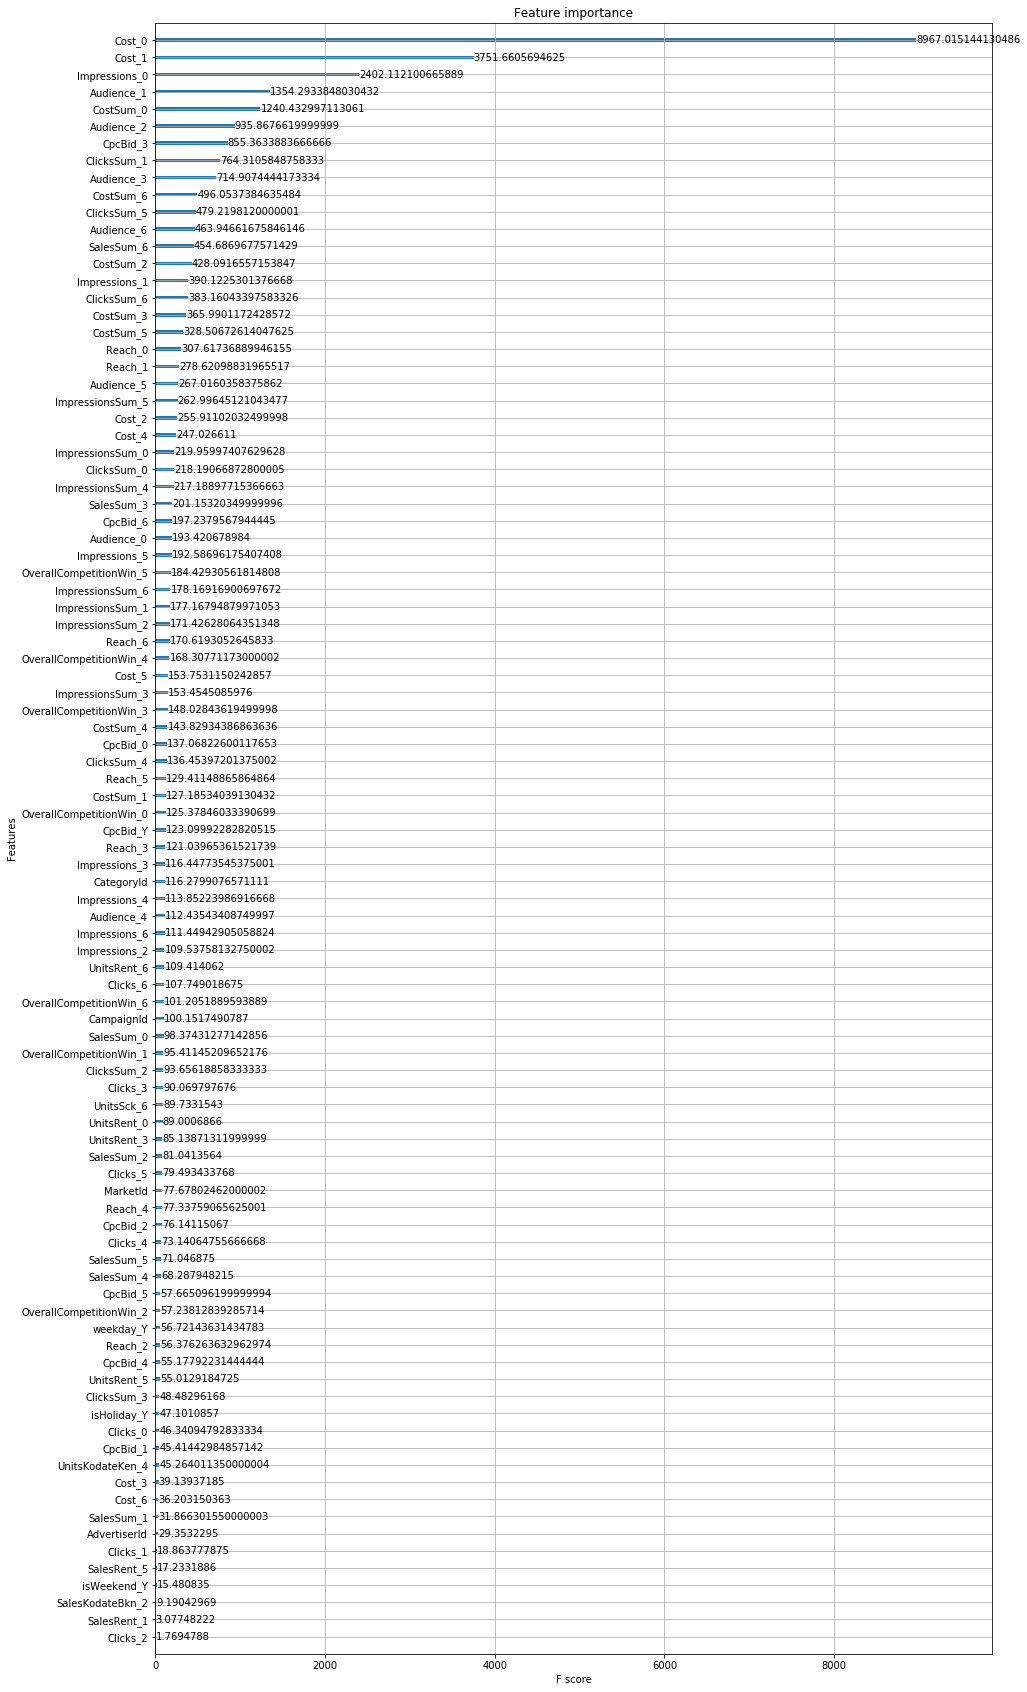

In [9]:
def draw_feat_importances(model):
    _, ax = plt.subplots(figsize=(15,30))
    xgb.plot_importance(model, ax=ax, importance_type='gain')
    plt.show()
draw_feat_importances(model)

In [10]:
fi = get_feat_importances(model)

### 最適化されたパラメータで予測モデルを作成
- テスト１：~2019/12/4を学習して2019/12/5~2019/12/11一週間を予測

In [11]:
# データの読込と前処理
in_dir = f'../data/two_years_each/test_1/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

# xgboost のデータ構造に転換
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

In [12]:
# バリデーションにおいて最適化されたパラメータで学習
model, evals_result = train2(d_train_sales, d_val_sales, params, best_iter=best_iter, esr=None)

[0]	train-rmse:5.74763	eval-rmse:6.13803
[1]	train-rmse:3.74291	eval-rmse:3.91594
[2]	train-rmse:2.5544	eval-rmse:2.53215
[3]	train-rmse:1.88957	eval-rmse:1.68517
[4]	train-rmse:1.54387	eval-rmse:1.16904
[5]	train-rmse:1.37235	eval-rmse:0.859176
[6]	train-rmse:1.28521	eval-rmse:0.68565
[7]	train-rmse:1.24631	eval-rmse:0.585798
[8]	train-rmse:1.22522	eval-rmse:0.532303
[9]	train-rmse:1.20875	eval-rmse:0.505083
[10]	train-rmse:1.19533	eval-rmse:0.491987
[11]	train-rmse:1.18803	eval-rmse:0.484378
[12]	train-rmse:1.17814	eval-rmse:0.475229
[13]	train-rmse:1.15665	eval-rmse:0.467728
[14]	train-rmse:1.13401	eval-rmse:0.465786
[15]	train-rmse:1.11396	eval-rmse:0.462716
[16]	train-rmse:1.09206	eval-rmse:0.462414
[17]	train-rmse:1.07376	eval-rmse:0.460185
[18]	train-rmse:1.06091	eval-rmse:0.457372
[19]	train-rmse:1.04485	eval-rmse:0.456978
[20]	train-rmse:1.03512	eval-rmse:0.451561
[21]	train-rmse:1.02181	eval-rmse:0.455728
[22]	train-rmse:1.00974	eval-rmse:0.458986
[23]	train-rmse:0.999464	eva

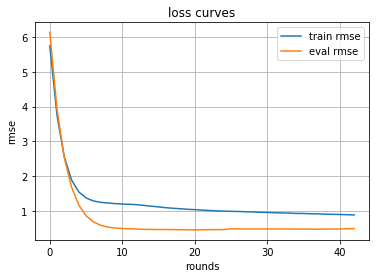

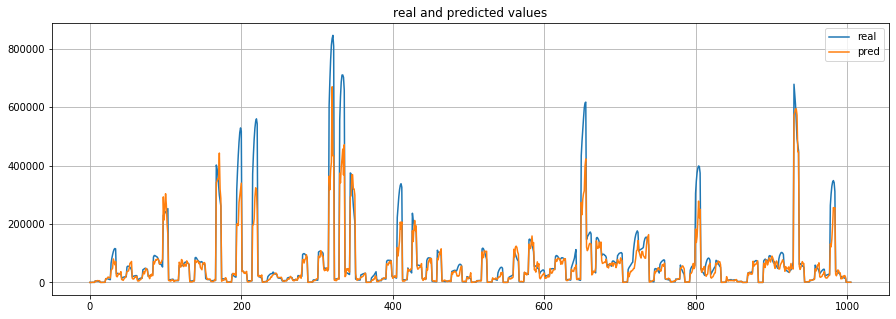

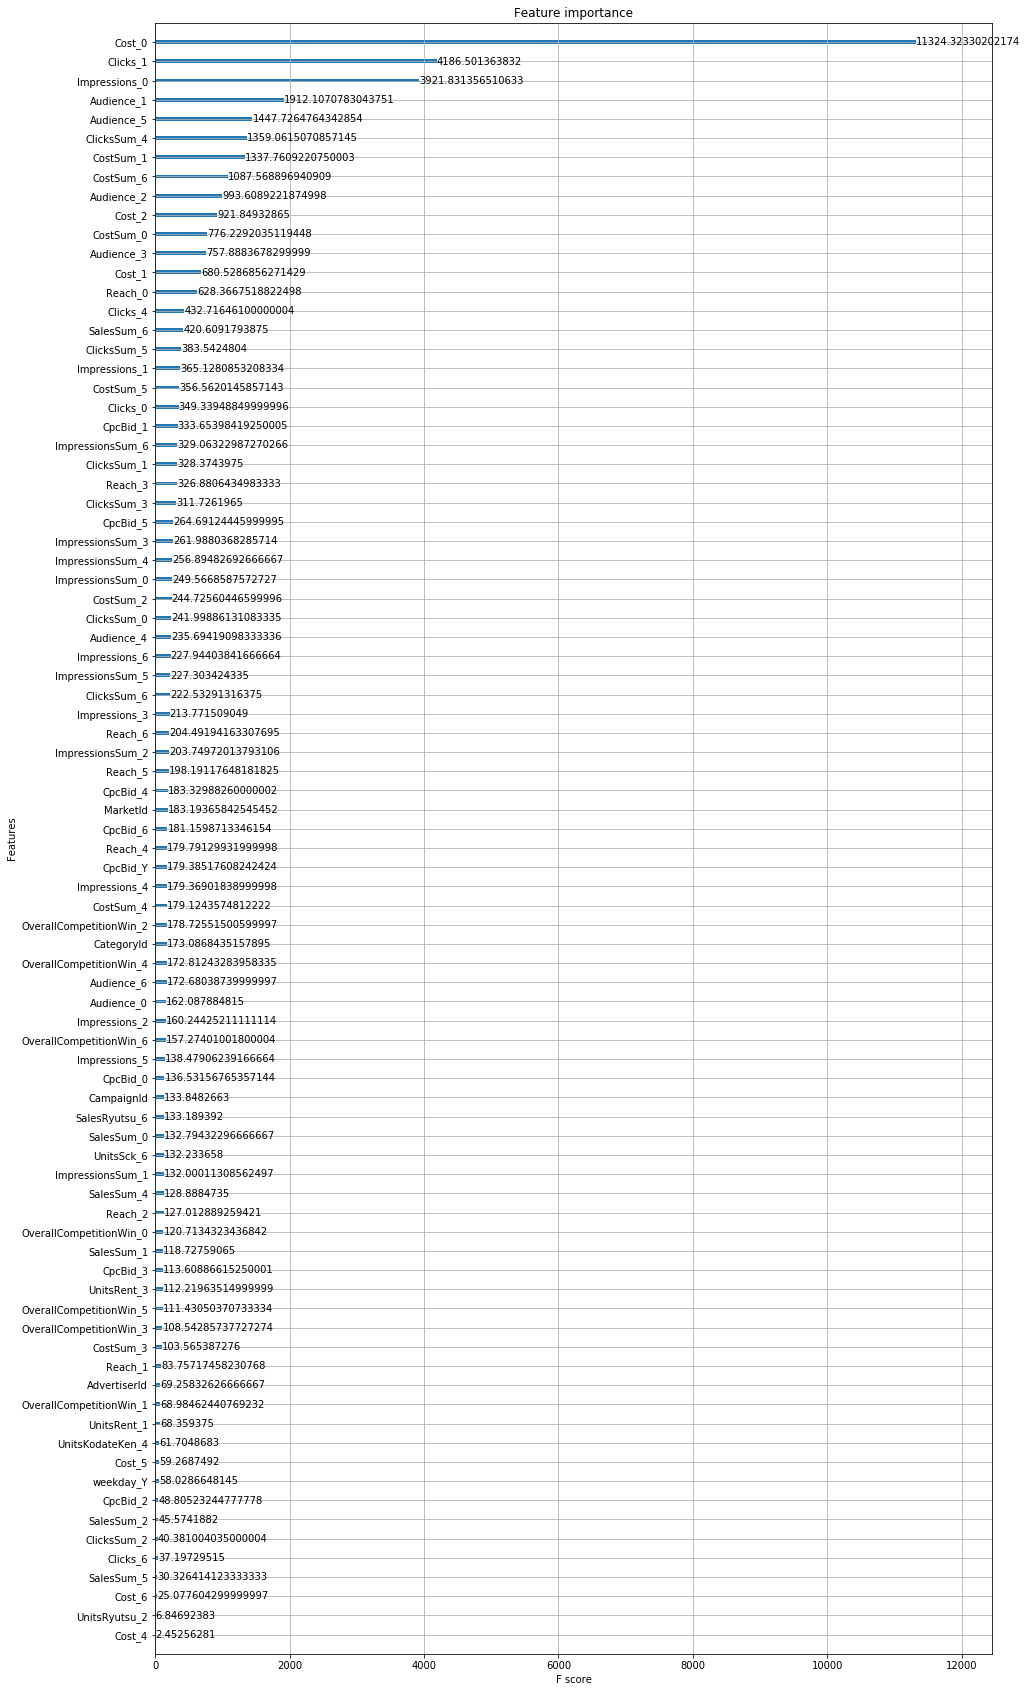

In [13]:
draw_loss(evals_result)
draw_preds(model, d_val, df_val_Y, target, 'test1')
draw_feat_importances(model)

- テスト２：~2019-12-11を学習して2019-12-12~2019-12-18一週間を予測

In [14]:
# データの読込と前処理
in_dir = f'../data/two_years_each/test_2/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

# xgboost のデータ構造に転換
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

In [15]:
# バリデーションにおいて最適化されたパラメータで学習
model, evals_result = train2(d_train_sales, d_val_sales, params, best_iter=best_iter, esr=None)

[0]	train-rmse:5.74976	eval-rmse:5.75426
[1]	train-rmse:3.74552	eval-rmse:3.5164
[2]	train-rmse:2.55784	eval-rmse:2.13682
[3]	train-rmse:1.89032	eval-rmse:1.29904
[4]	train-rmse:1.53754	eval-rmse:0.828046
[5]	train-rmse:1.36839	eval-rmse:0.584427
[6]	train-rmse:1.2845	eval-rmse:0.505908
[7]	train-rmse:1.23938	eval-rmse:0.580283
[8]	train-rmse:1.21567	eval-rmse:0.592755
[9]	train-rmse:1.1897	eval-rmse:0.606047
[10]	train-rmse:1.17702	eval-rmse:0.609993
[11]	train-rmse:1.16581	eval-rmse:0.616213
[12]	train-rmse:1.14446	eval-rmse:0.620114
[13]	train-rmse:1.1266	eval-rmse:0.623189
[14]	train-rmse:1.10588	eval-rmse:0.62013
[15]	train-rmse:1.09515	eval-rmse:0.601454
[16]	train-rmse:1.08967	eval-rmse:0.609081
[17]	train-rmse:1.08183	eval-rmse:0.609499
[18]	train-rmse:1.07716	eval-rmse:0.614656
[19]	train-rmse:1.06007	eval-rmse:0.628118
[20]	train-rmse:1.04631	eval-rmse:0.628309
[21]	train-rmse:1.03184	eval-rmse:0.635187
[22]	train-rmse:1.02038	eval-rmse:0.635237
[23]	train-rmse:1.01309	eval-r

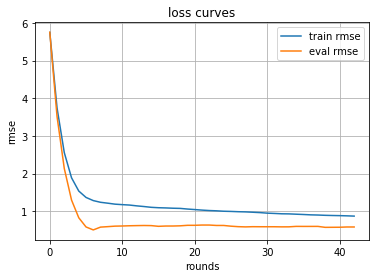

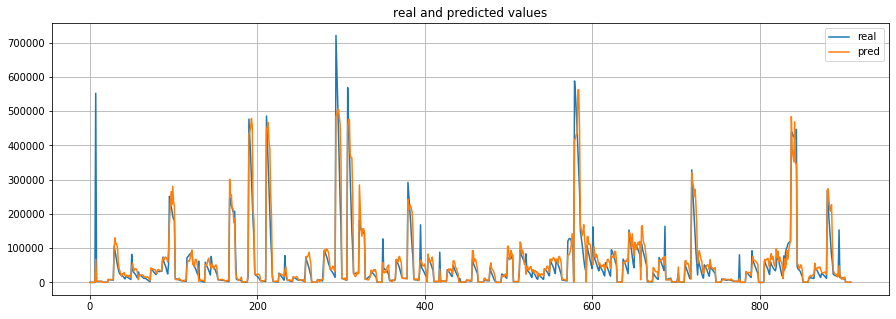

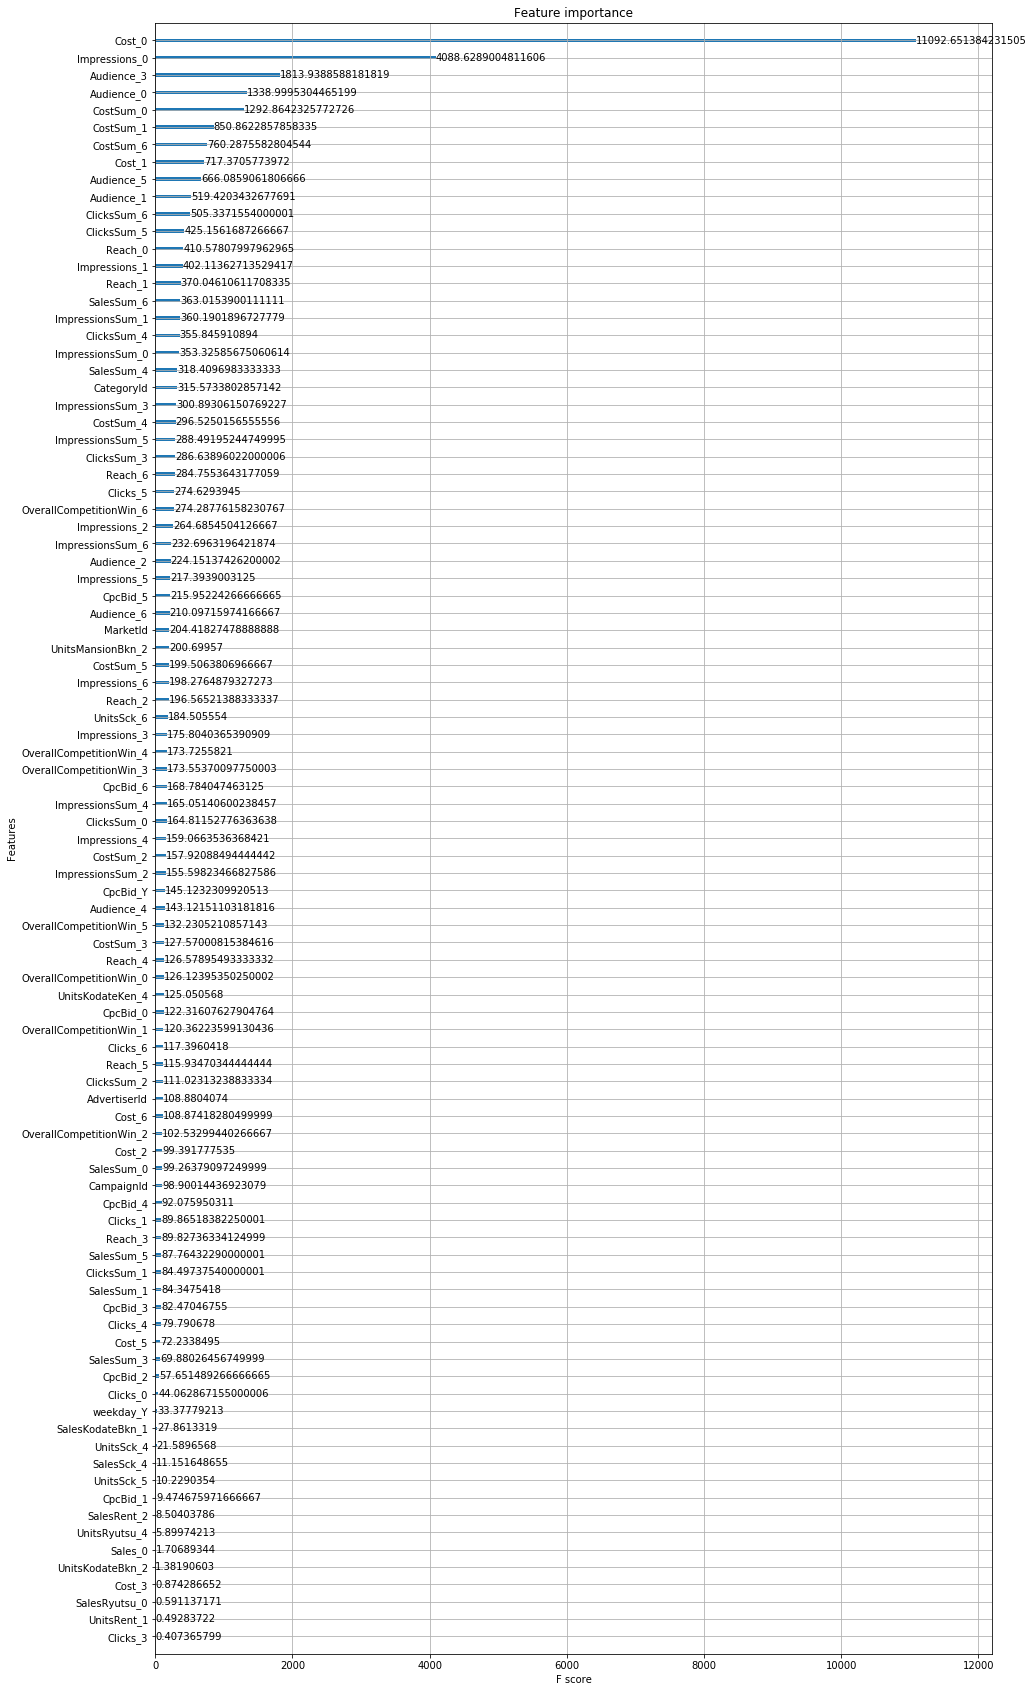

In [16]:
draw_loss(evals_result)
draw_preds(model, d_val, df_val_Y, target, 'test2')
draw_feat_importances(model)